In [1]:
######load your data#######
import os
from os import walk
import numpy as np
# load your data
paths = ["/Volumes/Gerardo HD/sintesis_dataset/am","/Volumes/Gerardo HD/sintesis_dataset/fm","/Volumes/Gerardo HD/sintesis_dataset/grain","/Volumes/Gerardo HD/sintesis_dataset/res","/Volumes/Gerardo HD/sintesis_dataset/waveshapping"]
#print(paths)
audios = []
labels = []
labelsname = []
for i in paths:
    for (dirpath, dirnames, filenames) in walk(i):
        for filename in filenames:
            audios.append(os.path.join(dirpath, filename))
            #audios.append(filename)
            #print(audios)
            if filename.startswith("am"):
                labels.append(0)
                labelsname.append("am")
            elif filename.startswith("fm"):
                labels.append(1)
                labelsname.append("fm")
            elif filename.startswith("grain"):
                labels.append(2)
                labelsname.append("grain")
            elif filename.startswith("res"):
                labels.append(3)
                labelsname.append("res")
            elif filename.startswith("waveshapping"):
                labels.append(4)
                labelsname.append("waveshapping")
        #print(filenames)
        #audios.append(filenames)
        break


In [2]:
###para espectograma
import librosa
import numpy as np

data = []
datastft = []
waveforms = []
nsr = 22050

for track in audios:
    y,fs = librosa.load(track)
    y = librosa.resample(y,fs,nsr)
    x = librosa.stft(y, n_fft=512, hop_length=len(y)//(120-1))
    x = librosa.amplitude_to_db(np.abs(x))
    f2 = np.mean(librosa.yin(y,100,2093,sr=nsr,frame_length= 2048,win_length= 1024))
    datastft.append(x)
    x = x.flatten()
    x = np.append(x,f2)
    data.append(x)
    waveforms.append(y)

data = np.array(data)
datastft = np.array(datastft)
waveforms = np.array(waveforms)

print(data.shape)
print(datastft.shape)
print(waveforms.shape)

(1000, 30841)
(1000, 257, 120)
(1000, 88200)


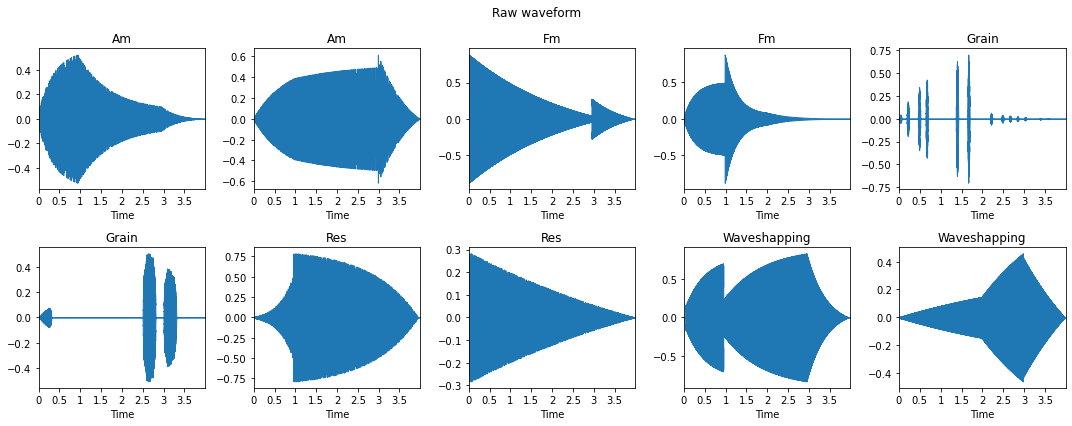

In [3]:
# visualize a few raw datapoints to get an idea about your "raw" data
# what are the units in the plot you are showing us?
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(15, 6)).suptitle("Raw waveform")
sonidos = [0,100,200,300,420,500,600,700,800,900]
labelsname = ["Am","Am","Fm","Fm","Grain","Grain","Res","Res","Waveshapping","Waveshapping"]

for i, x in enumerate(sonidos):
    plt.subplot(2, 5, i+ 1).set_title(labelsname[i])
    librosa.display.waveplot(waveforms[x],sr=nsr)
plt.tight_layout()

plt.show()

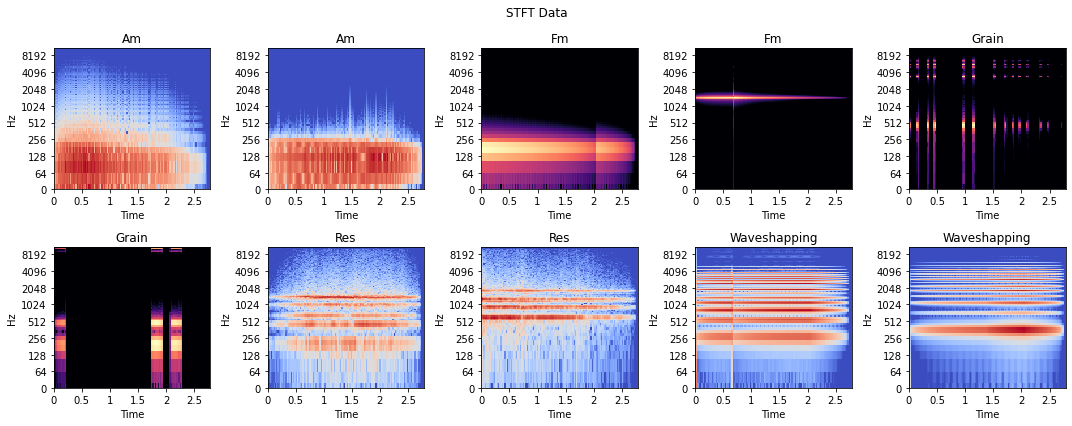

In [4]:
# visualize a few raw datapoints to get an idea about your "raw" data
# what are the units in the plot you are showing us?
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(15, 6)).suptitle("STFT Data")
plt.title('stft')
sonidos = [0,100,200,300,420,500,600,700,800,900]
labelsname = ["Am","Am","Fm","Fm","Grain","Grain","Res","Res","Waveshapping","Waveshapping"]

for i, x in enumerate(sonidos):
    plt.subplot(2, 5, i+ 1).set_title(labelsname[i])
    librosa.display.specshow(datastft[x], y_axis='log', x_axis='time')
plt.tight_layout()

plt.show()
####en el primer caso vemos la señal de audio tal cual en el el segundo caso vemos el espectograma
#de los sonidos sintetizados

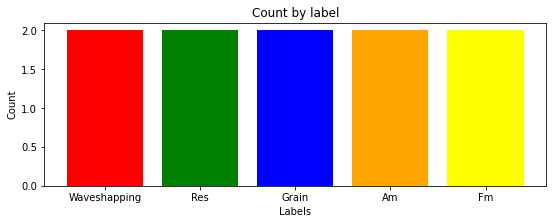

In [5]:
# visualize the labels of your dataset (could be as simple as a table)
# how many labels are there available per each datapoint?
# how are the different labels useful/needed?
import matplotlib.pyplot as plt
import numpy as np  

names = list(set(labelsname))
values = [labelsname.count(i) for i in names]
color = ['red', 'green', 'blue', 'orange', 'yellow']
plt.figure(figsize=(9, 3))
plt.bar(names, values,color=color)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count by label')
plt.show()
###en este caso separan los distintos tipos de sintesis

(30841,)
(30841,)


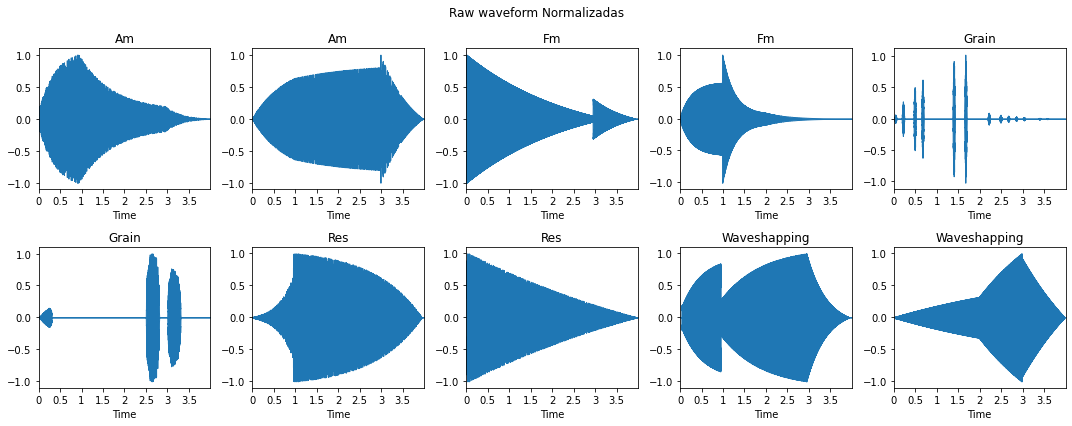

In [6]:
# pre-process the data (as needed before you can show it to your model).

# plot a few datapoints in your pre-processed data. 

# what's different between the plots of "raw" data and "pre-processed" data?
#la señal está normalizada a un rango de -1 a 1

# how do these differences make it easier for the model to learn from your data?

mu_ = np.mean(data, axis= 0)
print(mu_.shape)
s_ = np.std(data, axis = 0)
print(s_.shape)
#print(max_.shape)
mu_wave = np.mean(waveforms, axis= 1)[...,np.newaxis]
max_wave = np.max(waveforms, axis=1)[...,np.newaxis]

X = (data-mu_)/s_
Xw = (waveforms-mu_wave)/max_wave

plt.figure(figsize=(15, 6)).suptitle("Raw waveform Normalizadas")
sonidos = [0,100,200,300,420,500,600,700,800,900]
labelsname = ["Am","Am","Fm","Fm","Grain","Grain","Res","Res","Waveshapping","Waveshapping"]

for i, x in enumerate(sonidos):
    plt.subplot(2, 5, i+ 1).set_title(labelsname[i])
    librosa.display.waveplot(Xw[x],sr=nsr)
plt.tight_layout()

plt.show()

In [7]:
'''
plt.figure(figsize=(15, 6)).suptitle("STFT Data")
plt.title('stft')
sonidos = [0,100,200,300,420,500,600,700,800,900]
labelsname = ["Am","Am","Fm","Fm","Grain","Grain","Res","Res","Waveshapping","Waveshapping"]

for i, x in enumerate(sonidos):
    plt.subplot(2, 5, i+ 1).set_title(labelsname[i])
    librosa.stft(Xw[i],n_fft=512, hop_length=len(y)//(120-1))
    librosa.display.specshow(datastft[x], y_axis='log', x_axis='time')
plt.tight_layout()

plt.show()
###como se normalizan las stft
'''

'\nplt.figure(figsize=(15, 6)).suptitle("STFT Data")\nplt.title(\'stft\')\nsonidos = [0,100,200,300,420,500,600,700,800,900]\nlabelsname = ["Am","Am","Fm","Fm","Grain","Grain","Res","Res","Waveshapping","Waveshapping"]\n\nfor i, x in enumerate(sonidos):\n    plt.subplot(2, 5, i+ 1).set_title(labelsname[i])\n    librosa.stft(Xw[i],n_fft=512, hop_length=len(y)//(120-1))\n    librosa.display.specshow(datastft[x], y_axis=\'log\', x_axis=\'time\')\nplt.tight_layout()\n\nplt.show()\n###como se normalizan las stft\n'

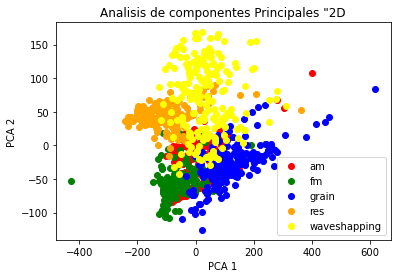

In [8]:
# plot ALL of your training data using t-SNE and PCA (must plot both)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(X)

plt.scatter(X_PCA[:199, 0], X_PCA[:199, 1], c='red', label='am')
plt.scatter(X_PCA[200:399, 0], X_PCA[200:399, 1], c='green', label='fm')
plt.scatter(X_PCA[400:599, 0], X_PCA[400:599, 1], c='blue', label='grain')
plt.scatter(X_PCA[600:799, 0], X_PCA[600:799, 1], c='orange', label='res')
plt.scatter(X_PCA[800:999, 0], X_PCA[800:999, 1], c='yellow', label='waveshapping')

plt.legend()
plt.title('Analisis de componentes Principales "2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

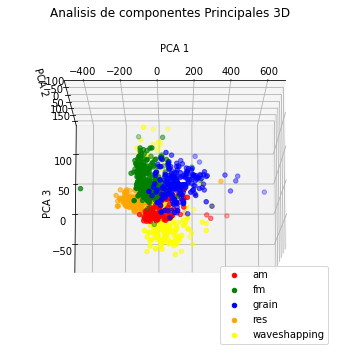

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig,elev=-20, azim=100)
X_reduced = PCA(n_components=3).fit_transform(X)
##fig = plt.figure(1, figsize=(12, 8))
ax = plt.axes(projection = "3d")
ax.scatter3D(X_reduced[:199, 0], X_reduced[:199, 1], X_reduced[:199, 2], c='red', label='am')
ax.scatter3D(X_reduced[200:399, 0], X_reduced[200:399, 1], X_reduced[200:399, 2], c='green', label='fm')
ax.scatter3D(X_reduced[400:599, 0], X_reduced[400:599, 1], X_reduced[400:599, 2], c='blue', label='grain')
ax.scatter3D(X_reduced[600:799, 0], X_reduced[600:799, 1], X_reduced[600:799, 2], c='orange', label='res')
ax.scatter3D(X_reduced[800:999, 0], X_reduced[800:999, 1], X_reduced[800:999, 2], c='yellow', label='waveshapping')
ax.view_init(-10,270)
#######
plt.title('Analisis de componentes Principales 3D')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend(loc='lower right')

plt.show()


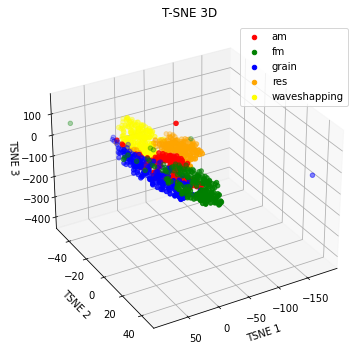

In [13]:
###t-SNE
from sklearn.manifold import TSNE  # for t-SNE
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig,elev=-20, azim=100)
tsne = TSNE(n_components= 3)  # create an instance of t-SNE
ax = plt.axes(projection = "3d")
X_tsne = tsne.fit_transform(X)  # fit and transform the data
ax.scatter3D(X_tsne[:199, 0], X_tsne[:199, 1], X_tsne[:199, 2], c='red', label='am')
ax.scatter3D(X_tsne[200:399, 0], X_tsne[200:399, 1], X_tsne[200:399, 2], c='green', label='fm')
ax.scatter3D(X_tsne[400:599, 0], X_tsne[400:599, 1], X_tsne[400:599, 2], c='blue', label='grain')
ax.scatter3D(X_tsne[600:799, 0], X_tsne[600:799, 1], X_tsne[600:799, 2], c='orange', label='res')
ax.scatter3D(X_tsne[800:999, 0], X_tsne[800:999, 1], X_tsne[800:999, 2], c='yellow', label='waveshapping')
ax.view_init(30,60)
plt.title('T-SNE 3D')
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')
ax.legend()
plt.show()

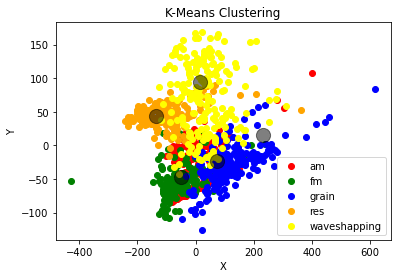

In [11]:
from sklearn.cluster import KMeans
X2 = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=5).fit(X2)
res = kmeans.predict(X2)
plt.scatter(X2[:199, 0], X2[:199, 1], c='red', label='am')
plt.scatter(X2[200:399, 0], X2[200:399, 1], c='green', label='fm')
plt.scatter(X2[400:599, 0], X2[400:599, 1], c='blue', label='grain')
plt.scatter(X2[600:799, 0], X2[600:799, 1], c='orange', label='res')
plt.scatter(X2[800:999, 0], X2[800:999, 1], c='yellow', label='waveshapping')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
